### K평균

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('./data/KMeansData.csv')
df.head()

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [4]:
X = df.iloc[:, :].values # 종속변수(y)가 없어서 X만
X

array([[  7.33,  73.  ],
       [  3.71,  55.  ],
       [  3.43,  55.  ],
       [  3.06,  89.  ],
       [  3.33,  79.  ],
       [  7.22,  26.  ],
       [  8.12,  15.  ],
       [  5.74,  62.  ],
       [  8.73,  59.  ],
       [  4.73,  74.  ],
       [  5.  ,  78.  ],
       [  2.63,  46.  ],
       [  7.02,   5.  ],
       [  3.45,  38.  ],
       [  3.06,  49.  ],
       [  4.13,  66.  ],
       [  9.17,  29.  ],
       [  7.61,  74.  ],
       [  0.94,  34.  ],
       [  3.67,  71.  ],
       [  8.47,   9.  ],
       [  2.86,  67.  ],
       [  1.9 ,  43.  ],
       [  6.08,   0.  ],
       [  8.42,  90.  ],
       [  6.12,  77.  ],
       [  0.  ,  47.  ],
       [  2.16,  50.  ],
       [  2.24,  38.  ],
       [  2.31,  23.  ],
       [  8.03,  31.  ],
       [  9.02,   2.  ],
       [  2.43,  20.  ],
       [  4.5 ,  80.  ],
       [  8.66,  70.  ],
       [  7.95,  75.  ],
       [  2.03,  26.  ],
       [  5.43,  74.  ],
       [  4.44,  78.  ],
       [  3.17,  76.  ],


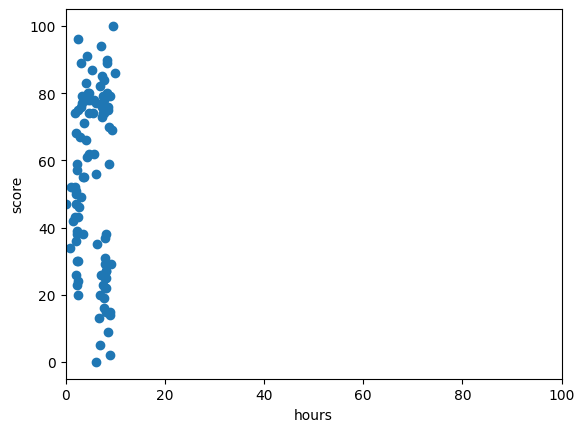

In [5]:
plt.scatter(X[:, 0], X[:, 1]) #x[0]:공부시간, X[1]:점수
plt.xlabel('hours')
plt.ylabel('score')
plt.xlim(0, 100) # X, y축의 단위를 맞춰주기위해
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537],
       [ 0.64615029, -1.07514723],
       [ 0.98282328, -1.49888853],
       [ 0.09251026,  0.31164246],
       [ 1.21101275,  0.19607665],
       [-0.28531166,  0.77390569],
       [-0.18430976,  0.92799344],
       [-1.07088197, -0.30470851],
       [ 0.57133407, -1.88410788],
       [-0.76413547, -0.612884  ],
       [-0.9100271 , -0.18914271],
       [-0.50976032,  0.4657302 ],
       [ 1.37560843, -0.95958142],
       [ 0.79204192,  0.77390569],
       [-1.70307903, -0.76697174],
       [-0.68183762,  0.65833988],
       [ 1.11375166, -1.73002014],
       [-0.98484332,  0.50425214],
       [-1.34396117, -0.42027432],
       [ 0.21969783, -2.07671756],
       [ 1.09504761,  1.39025667],
       [ 0.23466107,  0.8894715 ],
       [-2.05471527, -0.26618658],
       [-1.24670009, -0.15062077],
       [-1.2167736 ,

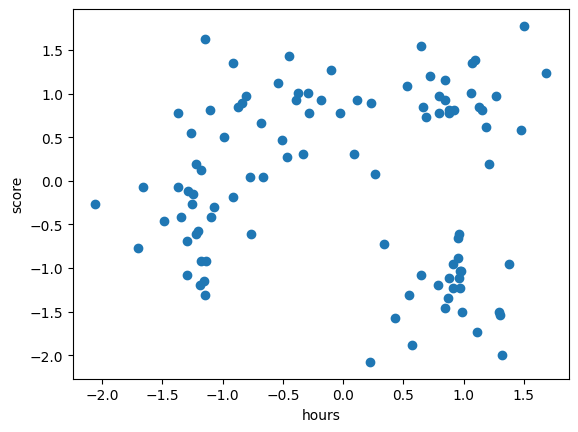

In [7]:
plt.scatter(X[:, 0], X[:, 1]) #x[0]:공부시간, X[1]:점수
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

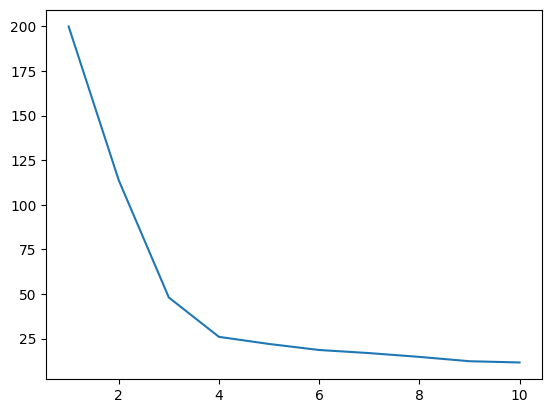

In [8]:
from sklearn.cluster import KMeans
center_list = [] #중심점 평균을 넣는 곳

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10) # n_init은 디폴트값
    kmeans.fit(X)
    center_list.append(kmeans.inertia_) #center_list에 평균 거리를 넣기
    
plt.plot(range(1, 11), center_list)
plt.show()

In [9]:
K = 4 # 4개의 그룹으로 정의
kmeans = KMeans(n_clusters=K, random_state=0, n_init=10)
group = kmeans.fit_predict(X) # 어느 그룹에 속하는지
group

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3])

In [10]:
centers = kmeans.cluster_centers_ #중심점 찾기
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

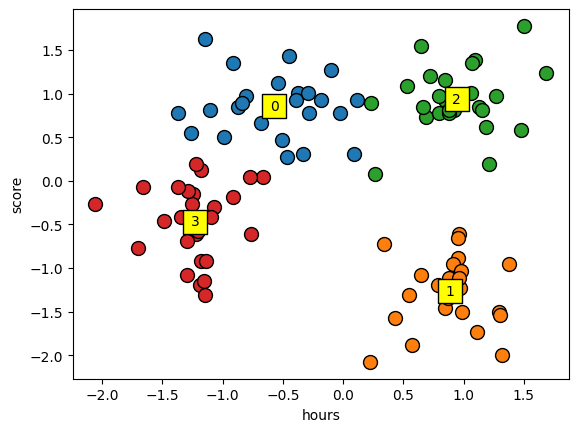

In [11]:
for cluster in range(4):
    plt.scatter(X[group == cluster, 0], X[group == cluster, 1], s=100, edgecolors='black')
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, edgecolors='black', color='yellow', marker='s')
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va='center', ha='center')

plt.xlabel('hours')
plt.ylabel('score')

plt.show()

In [12]:
# x값을 원래 값으로 바꾸는
X_org = sc.inverse_transform(X) 
X_org
centers_org = sc.inverse_transform(centers)

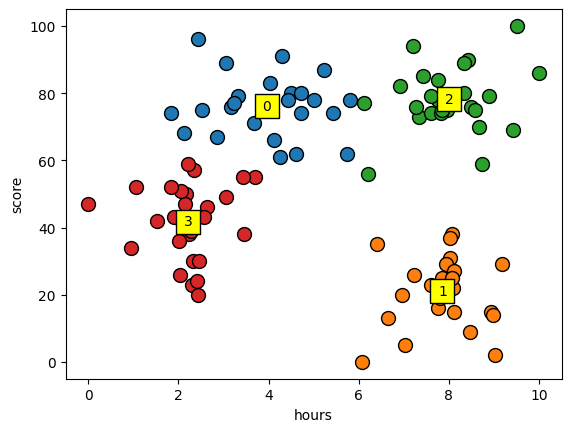

In [13]:
for cluster in range(4):
    plt.scatter(X_org[group == cluster, 0], X_org[group == cluster, 1], s=100, edgecolors='black')
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s=300, edgecolors='black', color='yellow', marker='s')
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va='center', ha='center')

plt.xlabel('hours')
plt.ylabel('score')

plt.show()

In [18]:
df2 = pd.DataFrame(X_org)
df2.columns=['hour', 'score']
df2

,hour,score
0,7.33,73.0
1,3.71,55.0
2,3.43,55.0
3,3.06,89.0
4,3.33,79.0
...,...,...
95,6.21,56.0
96,7.76,84.0
97,5.22,87.0
98,6.65,13.0


In [19]:
df3 = pd.DataFrame(group)
df3.columns=['group']
df3

,group
0,2
1,3
2,3
3,0
4,0
...,...
95,2
96,2
97,0
98,1


In [20]:
pd.concat([df2, df3], axis=1)

,hour,score,group
0,7.33,73.0,2
1,3.71,55.0,3
2,3.43,55.0,3
3,3.06,89.0,0
4,3.33,79.0,0
...,...,...,...
95,6.21,56.0,2
96,7.76,84.0,2
97,5.22,87.0,0
98,6.65,13.0,1
